# Import Libs and Load Data

In [1]:
import tensorflow as tf;
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.models import Model

2023-12-06 13:15:00.185561: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-06 13:15:01.311658: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 13:15:03.451715: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 13:15:03.451885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 13:15:03.760556: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
#load Data

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape : {} "+ format(x_train.shape))


x_train.shape : {} (60000, 28, 28)


In [3]:
#Convolution excpects Height X Width X Color
# But the Data only is 2D ,

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
#Number of Classes:
k = len(set((y_train)))
print("Number of classes ", k)

Number of classes  10


Start Building the Model with Keras

In [5]:
#Build Model using the functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)


# compiling the Model and Fitting it

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test) , epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5271 - accuracy: 0.8049 - val_loss: 0.4130 - val_accuracy: 0.8461
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3693 - accuracy: 0.8619 - val_loss: 0.3621 - val_accuracy: 0.8605
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3186 - accuracy: 0.8807 - val_loss: 0.3293 - val_accuracy: 0.8787
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2820 - accuracy: 0.8942 - val_loss: 0.3175 - val_accuracy: 0.8868
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2570 - accuracy: 0.9031 - val_loss: 0.3129 - val_accuracy: 0.8871
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2351 - accuracy: 0.9111 - val_loss: 0.3030 - val_accuracy: 0.8919
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2170 - accuracy: 0.9169 - val_loss: 0.2958 - val_accuracy

Plotting Loss and Accuracy :

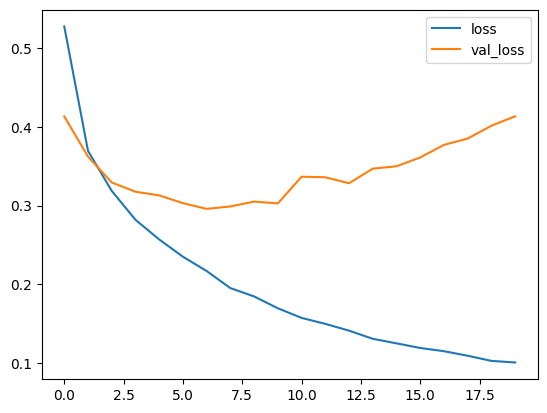

In [6]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

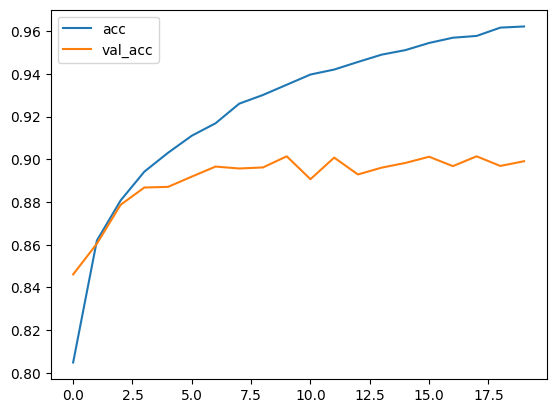

In [7]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

Confusion Matrix

313/313 [==============================] - 1s 1ms/step
Confusion Matrix, without normalizaiton
[[858   2  28  18   4   0  88   0   2   0]
 [  3 973   1  15   2   0   4   0   2   0]
 [ 18   0 900   8  36   0  38   0   0   0]
 [ 12   6  22 915  24   1  20   0   0   0]
 [  2   1 100  23 810   0  63   0   1   0]
 [  0   0   0   0   0 984   0  10   0   6]
 [118   1  96  27  86   1 660   0  11   0]
 [  0   0   0   0   0  10   0 960   0  30]
 [  5   0   4   4   8   3  12   1 963   0]
 [  1   0   0   0   0   7   0  24   0 968]]
cm.shape[0] 10
cm.shape[1] 10


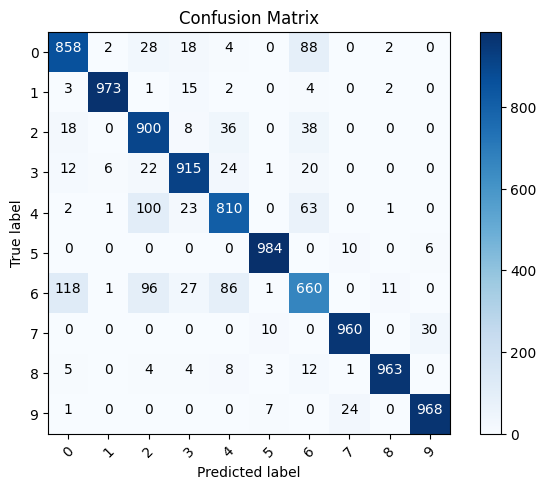

In [8]:
#plot confusion matrix

from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
    This Funciton prints and plots the confusion matrix,
    Normalization can be applied by setting `normalize=True`.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confused Matrix')
  else:
    print('Confusion Matrix, without normalizaiton')
  
  print(cm)
  print("cm.shape[0]", cm.shape[0])
  print("cm.shape[1]", cm.shape[1])
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [9]:
#label mapping :

labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.splitlines()

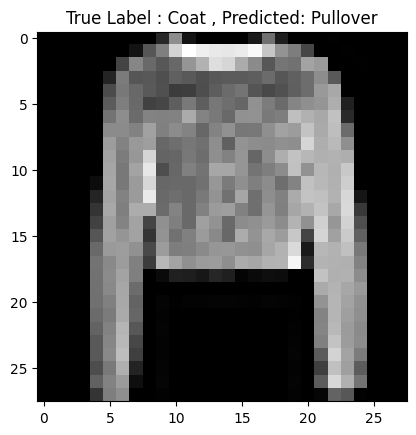

In [21]:
#Show Misclassified examples:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True Label : %s , Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
